# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [15]:
# Import warnings
import warnings
warnings.filterwarnings("ignore")

In [16]:
# Import the libraries you will be using for analysis
!pip install numpy --version 1.26.4
!pip install pandas --version 2.2.2
!pip install matplotlib --version 3.10.0
!pip install seaborn --version 0.13.2

ERROR: Could not find a version that satisfies the requirement 1.26.4 (from versions: none)
ERROR: No matching distribution found for 1.26.4


ERROR: Could not find a version that satisfies the requirement 2.2.2 (from versions: none)
ERROR: No matching distribution found for 2.2.2


ERROR: Could not find a version that satisfies the requirement 3.10.0 (from versions: none)
ERROR: No matching distribution found for 3.10.0


ERROR: Could not find a version that satisfies the requirement 0.13.2 (from versions: none)
ERROR: No matching distribution found for 0.13.2


In [17]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Check versions

print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.8.4
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [20]:
# Try loading one file

# df = pd.read_parquet('2023-1.parquet')
# df.info()
df = pd.read_parquet(r"\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records\2023-1.parquet")
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

(3041714, 19)

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [26]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [27]:
# from google.colab import drive
# drive.mount('/content/drive')

In [28]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

import os

# Select the folder having data files
os.chdir(r'C:\Users\p.d.ramakrishnan\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()
print(file_list)
# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)
        print(file_path)
        # Reading the current file
        data=pd.read_parquet(file_path)
        print(data.shape)

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        data['Date_of_journey']=data['tpep_pickup_datetime'].dt.day
        data['Month_of_journey']=data['tpep_pickup_datetime'].dt.month
        data['Hour_of_journey']=data['tpep_pickup_datetime'].dt.hour

        date_list=data['Date_of_journey'].unique()
        hour_list=data['Hour_of_journey'].unique()
        
        # Loop through dates and then loop through every hour of each date
        #sampled_data_for_all_dates=pd.DataFrame()
            # Iterate through each hour of the selected date
        for i in date_list:
            for j in hour_list:
                data_subset=data[(data['Date_of_journey']==i) & (data['Hour_of_journey']==j)]
                
                # Sample 5% of the hourly data randomly
                sample = data_subset.sample(frac = 0.05, random_state = 42)
                print("Sample data shape ",sample.shape)
                # add data of this hour to the dataframe
                sampled_data=pd.concat([sample,sampled_data],axis=0)
        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df,sampled_data],axis=0)

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

['2023-1.parquet', '2023-10.parquet', '2023-11.parquet', '2023-12.parquet', '2023-2.parquet', '2023-3.parquet', '2023-4.parquet', '2023-5.parquet', '2023-6.parquet', '2023-7.parquet', '2023-8.parquet', '2023-9.parquet']
C:\Users\p.d.ramakrishnan\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records\2023-1.parquet
(3041714, 19)
Sample data shape  (265, 22)
Sample data shape  (101, 22)
Sample data shape  (286, 22)
Sample data shape  (211, 22)
Sample data shape  (129, 22)
Sample data shape  (253, 22)
Sample data shape  (214, 22)
Sample data shape  (203, 22)
Sample data shape  (195, 22)
Sample data shape  (123, 22)
Sample data shape  (143, 22)
Sample data shape  (54, 22)
Sample data shape  (44, 22)
Sample data shape  (138, 22)
Sample data shape  (50, 22)
Sample data shape  (56, 22)
Sample data shape  (171, 22)
Sample data shape  (82, 22)
Sample data shape  (133, 22)
Sample data shape  (167, 22)
Sample data shape  (190, 22)
Sample data shape  (198, 22)
Sample data shape

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [30]:
# Store the df in csv/parquet
# df.to_parquet('')
df.to_csv(r"\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\taxi_data_final.csv")
df.to_parquet(r"\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\taxi_data_final.parquet")

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [33]:
# Load the new data file
df=pd.read_parquet(r"\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\taxi_data_final.parquet")



In [34]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
2875885         1  2023-01-30 18:08:29   2023-01-30 18:52:55              1.0   
2873320         2  2023-01-30 18:29:29   2023-01-30 18:42:25              1.0   
2877724         2  2023-01-30 18:45:36   2023-01-30 19:04:29              1.0   
2872612         2  2023-01-30 18:58:11   2023-01-30 19:08:49              1.0   
2872792         2  2023-01-30 18:46:23   2023-01-30 18:52:18              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
2875885          18.00         2.0                  N           132   
2873320           2.25         1.0                  N           162   
2877724           3.71         1.0                  N           161   
2872612           1.74         1.0                  N           234   
2872792           0.95         1.0                  N           170   

         DOLocationID  payment_type  ...  tip_amount  tolls_amount  \
2875885           162             1  ...       12.00          6.55   
2873320           113             1  ...        3.10          0.00   
2877724           261             1  ...        5.26          0.00   
2872612           231             1  ...        3.58          0.00   
2872792           161             1  ...        0.15          0.00   

         improvement_surcharge  total_amount  congestion_surcharge  \
2875885                    1.0         98.80                   2.5   
2873320                    1.0         23.80                   2.5   
2877724                    1.0         31.56                   2.5   
2872612                    1.0         21.48                   2.5   
2872792                    1.0         13.85                   2.5   

         airport_fee  Date_of_journey  Month_of_journey  Hour_of_journey  \
2875885         1.25               30                 1               18   
2873320         0.00               30                 1               18   
2877724         0.00               30                 1               18   
2872612         0.00               30                 1               18   
2872792         0.00               30                 1               18   

         Airport_fee  
2875885          NaN  
2873320          NaN  
2877724          NaN  
2872612          NaN  
2872792          NaN  

[5 rows x 23 columns]

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1896420 entries, 2875885 to 1962
Data columns (total 23 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            f

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [38]:
# Fix the index and drop any columns that are not needed
df.reset_index(inplace=True,drop=True)
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2023-01-30 18:08:29   2023-01-30 18:52:55              1.0   
1         2  2023-01-30 18:29:29   2023-01-30 18:42:25              1.0   
2         2  2023-01-30 18:45:36   2023-01-30 19:04:29              1.0   
3         2  2023-01-30 18:58:11   2023-01-30 19:08:49              1.0   
4         2  2023-01-30 18:46:23   2023-01-30 18:52:18              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0          18.00         2.0                  N           132           162   
1           2.25         1.0                  N           162           113   
2           3.71         1.0                  N           161           261   
3           1.74         1.0                  N           234           231   
4           0.95         1.0                  N           170           161   

   payment_type  ...  tip_amount  tolls_amount  improvement_surcharge  \
0             1  ...       12.00          6.55                    1.0   
1             1  ...        3.10          0.00                    1.0   
2             1  ...        5.26          0.00                    1.0   
3             1  ...        3.58          0.00                    1.0   
4             1  ...        0.15          0.00                    1.0   

   total_amount  congestion_surcharge  airport_fee  Date_of_journey  \
0         98.80                   2.5         1.25               30   
1         23.80                   2.5         0.00               30   
2         31.56                   2.5         0.00               30   
3         21.48                   2.5         0.00               30   
4         13.85                   2.5         0.00               30   

   Month_of_journey  Hour_of_journey  Airport_fee  
0                 1               18          NaN  
1                 1               18          NaN  
2                 1               18          NaN  
3                 1               18          NaN  
4                 1               18          NaN  

[5 rows x 23 columns]

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [40]:
# Combine the two airport fee columns
#Checking to see if there are any cases where both columns are populated
df[(df['airport_fee'].notnull()) & (df['Airport_fee'].notnull())].shape


(0, 23)

In [41]:
#Converting the airport_fee into a single column by merging the data of both columns
df['airport_fee']=[j if(np.isnan(i)) else i for i,j in zip(df['airport_fee'],df['Airport_fee'])]

In [42]:
#checking the distribution after the changes
df['airport_fee'].value_counts()

airport_fee
 0.00    1670588
 1.75     121153
 1.25      39788
-1.75         11
-1.25          4
 1.00          1
Name: count, dtype: int64

In [43]:
#deleting the other 'Airport_fee' column
del(df['Airport_fee'])
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee',
       'Date_of_journey', 'Month_of_journey', 'Hour_of_journey'],
      dtype='object')

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [45]:
#checking columns that have negative values
df.select_dtypes(include='number').min()

VendorID                 1.00
passenger_count          0.00
trip_distance            0.00
RatecodeID               1.00
PULocationID             1.00
DOLocationID             1.00
payment_type             0.00
fare_amount              0.00
extra                   -2.50
mta_tax                 -0.50
tip_amount               0.00
tolls_amount             0.00
improvement_surcharge   -1.00
total_amount            -5.75
congestion_surcharge    -2.50
airport_fee             -1.75
Date_of_journey          1.00
Month_of_journey         1.00
Hour_of_journey          0.00
dtype: float64

In [46]:
#checking for the rows where one of the below columns are negative and checking shape of the output dataframe
df[(df['extra']<0)|(df['mta_tax']<0)|(df['improvement_surcharge']<0)|(df['total_amount']<0)|(df['congestion_surcharge']<0)|(df['airport_fee']<0)].shape

(81, 22)

In [47]:
# check where values of fare amount are negative
#there are no rows where fare amount is negative though there are rows with total amount negative

#Since there are only 81 rows, removing that from the dataframe (and storing the 81 rows in a different dataframe if it is required later)
df_with_negative_values=df[(df['extra']<0)|(df['mta_tax']<0)|(df['improvement_surcharge']<0)|(df['total_amount']<0)|(df['congestion_surcharge']<0)|(df['airport_fee']<0)]
df=df[~((df['extra']<0)|(df['mta_tax']<0)|(df['improvement_surcharge']<0)|(df['total_amount']<0)|(df['congestion_surcharge']<0)|(df['airport_fee']<0))]
df.shape

(1896339, 22)

Did you notice something different in the `RatecodeID` column for above records?

In [49]:
# Analyse RatecodeID for the negative fare amounts
print(df_with_negative_values['RatecodeID'].value_counts()) # there are ratecodes with 6 i.e group rides
print(df_with_negative_values['VendorID'].value_counts()) #all the negative rows are coming from vendor 2

RatecodeID
1.0    53
2.0    23
5.0     3
3.0     1
4.0     1
Name: count, dtype: int64
VendorID
2    81
Name: count, dtype: int64


In [50]:
# Find which columns have negative values
#Since there are only 81 rows, removing that from the dataframe (and storing the 81 rows in a different dataframe if it is required later)
df_with_negative_values=df[(df['extra']<0)|(df['mta_tax']<0)|(df['improvement_surcharge']<0)|(df['total_amount']<0)|(df['congestion_surcharge']<0)|(df['airport_fee']<0)]
df=df[~((df['extra']<0)|(df['mta_tax']<0)|(df['improvement_surcharge']<0)|(df['total_amount']<0)|(df['congestion_surcharge']<0)|(df['airport_fee']<0))]
df.shape

(1896339, 22)

In [51]:
# fix these negative values

#Removed the rows with negative values in either of the monetary columns since there were only 81 such rows. They form a very small percentage of 
# entire dataset . Hence, removed them from the data


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [54]:
# Find the proportion of missing values in each column
round((df.isnull().sum()/df.shape[0]*100),3)
# There are 5 columns with missing values - passenger_count, RateCodeID,store_and_fwd_flag, congestion_surcharge,airport_fee 

VendorID                 0.000
tpep_pickup_datetime     0.000
tpep_dropoff_datetime    0.000
passenger_count          3.421
trip_distance            0.000
RatecodeID               3.421
store_and_fwd_flag       3.421
PULocationID             0.000
DOLocationID             0.000
payment_type             0.000
fare_amount              0.000
extra                    0.000
mta_tax                  0.000
tip_amount               0.000
tolls_amount             0.000
improvement_surcharge    0.000
total_amount             0.000
congestion_surcharge     3.421
airport_fee              3.421
Date_of_journey          0.000
Month_of_journey         0.000
Hour_of_journey          0.000
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [56]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'

#All the missing values are coming from the same set of records
#they dont seem to missing at random, there seems to be a pattern in these missing values.

df.fillna({'passenger_count':df['passenger_count'].median(),'RatecodeID':df['RatecodeID'].mode()[0],'airport_fee':0},inplace=True)
df.fillna({'congestion_surcharge':df['congestion_surcharge'].median(),'store_and_fwd_flag':df['store_and_fwd_flag'].mode()[0]},inplace=True)

In [57]:
#checking the data again after imputation
df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
Date_of_journey          0
Month_of_journey         0
Hour_of_journey          0
dtype: int64

In [58]:
df['passenger_count'].value_counts()

passenger_count
1.0    1442155
2.0     277229
3.0      68967
4.0      38542
0.0      29683
5.0      23875
6.0      15866
8.0         11
9.0          6
7.0          5
Name: count, dtype: int64

In [59]:
#Imputing 0 in passenger counts with 1 since that is most frequent
df['passenger_count']=df['passenger_count'].apply(lambda x : 1 if(x==0) else x)
df['passenger_count'].value_counts()

passenger_count
1.0    1471838
2.0     277229
3.0      68967
4.0      38542
5.0      23875
6.0      15866
8.0         11
9.0          6
7.0          5
Name: count, dtype: int64

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [62]:
# Fix missing values in 'RatecodeID'
#Converting ratecode ID values of 99 with 1 (most frequent value)
df['RatecodeID'].value_counts()
df['RatecodeID']=df['RatecodeID'].apply(lambda x: 1 if(x==99) else x)
df['RatecodeID'].value_counts()

RatecodeID
1.0    1804646
2.0      71561
5.0      10290
3.0       6122
4.0       3717
6.0          3
Name: count, dtype: int64

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [64]:
# handle null values in congestion_surcharge
df['congestion_surcharge'].isnull().sum() #already imputed with median

0

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [66]:
# Handle any remaining missing values

#Missing value check
df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
Date_of_journey          0
Month_of_journey         0
Hour_of_journey          0
dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [69]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
df.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  1.896339e+06                     1896339                     1896339   
mean   1.733088e+00  2023-07-02 19:31:53.163020  2023-07-02 19:49:18.871294   
min    1.000000e+00         2001-01-01 00:06:49         2001-01-01 15:42:11   
25%    1.000000e+00  2023-04-02 16:08:42.500000         2023-04-02 16:27:08   
50%    2.000000e+00         2023-06-27 15:42:18         2023-06-27 15:59:01   
75%    2.000000e+00  2023-10-06 19:35:55.500000  2023-10-06 19:51:59.500000   
max    6.000000e+00         2024-01-01 00:01:34         2024-01-01 20:50:55   
std    4.475841e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     1.896339e+06   1.896339e+06  1.896339e+06  1.896339e+06   
mean      1.372177e+00   3.843700e+00  1.071786e+00  1.652696e+02   
min       1.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00   
25%       1.000000e+00   1.050000e+00  1.000000e+00  1.320000e+02   
50%       1.000000e+00   1.790000e+00  1.000000e+00  1.620000e+02   
75%       1.000000e+00   3.400000e+00  1.000000e+00  2.340000e+02   
max       9.000000e+00   1.263605e+05  6.000000e+00  2.650000e+02   
std       8.644413e-01   1.271909e+02  3.872942e-01  6.400076e+01   

       DOLocationID  payment_type   fare_amount  ...       mta_tax  \
count  1.896339e+06  1.896339e+06  1.896339e+06  ...  1.896339e+06   
mean   1.640441e+02  1.163778e+00  1.991727e+01  ...  4.953180e-01   
min    1.000000e+00  0.000000e+00  0.000000e+00  ...  0.000000e+00   
25%    1.140000e+02  1.000000e+00  9.300000e+00  ...  5.000000e-01   
50%    1.620000e+02  1.000000e+00  1.350000e+01  ...  5.000000e-01   
75%    2.340000e+02  1.000000e+00  2.190000e+01  ...  5.000000e-01   
max    2.650000e+02  4.000000e+00  1.431635e+05  ...  4.000000e+00   
std    6.980101e+01  5.080874e-01  1.055388e+02  ...  4.846019e-02   

         tip_amount  tolls_amount  improvement_surcharge  total_amount  \
count  1.896339e+06  1.896339e+06           1.896339e+06  1.896339e+06   
mean   3.547129e+00  5.964458e-01           9.990543e-01  2.898046e+01   
min    0.000000e+00  0.000000e+00           0.000000e+00  0.000000e+00   
25%    1.000000e+00  0.000000e+00           1.000000e+00  1.596000e+01   
50%    2.850000e+00  0.000000e+00           1.000000e+00  2.100000e+01   
75%    4.420000e+00  0.000000e+00           1.000000e+00  3.094000e+01   
max    2.230800e+02  1.430000e+02           1.000000e+00  1.431675e+05   
std    4.056790e+00  2.187060e+00           2.833469e-02  1.064181e+02   

       congestion_surcharge   airport_fee  Date_of_journey  Month_of_journey  \
count          1.896339e+06  1.896339e+06     1.896339e+06      1.896339e+06   
mean           2.314323e+00  1.380311e-01     1.551783e+01      6.540130e+00   
min            0.000000e+00  0.000000e+00     1.000000e+00      1.000000e+00   
25%            2.500000e+00  0.000000e+00     8.000000e+00      4.000000e+00   
50%            2.500000e+00  0.000000e+00     1.500000e+01      6.000000e+00   
75%            2.500000e+00  0.000000e+00     2.300000e+01      1.000000e+01   
max            2.500000e+00  1.750000e+00     3.100000e+01      1.200000e+01   
std            6.555279e-01  4.575895e-01     8.695638e+00      3.466799e+00   

       Hour_of_journey  
count     1.896339e+06  
mean      1.426506e+01  
min       0.000000e+00  
25%       1.100000e+01  
50%       1.500000e+01  
75%       1.900000e+01  
max       2.300000e+01  
std       5.807420e+00  

[8 rows x 21 columns]

<Axes: >

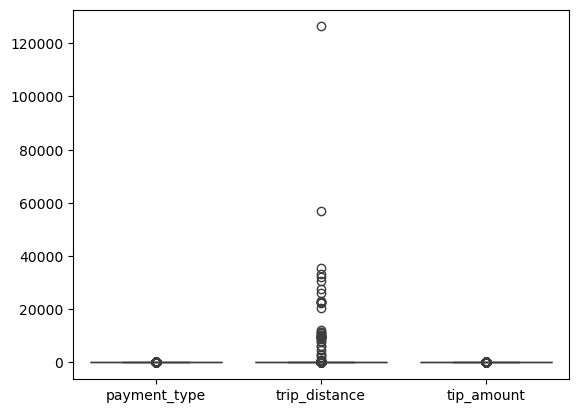

In [70]:
#Check outliers in payment_type, trip_distance and tip_amount
sns.boxplot(df[['payment_type','trip_distance','tip_amount']])

Some observations:
#There are some rows with low and high values for trip distance =0, 126360  ; 
#There are rows with passenger count=9;
#There are rows with date other than 2023 #pickup drop timing is 2001, cutoffs
#Low and high values for amount : total amount =0 and total amount 143167 ; fare_amount 0 to 1431635
#There are some rows with vendorId=6
#There are some rows with payment_type=0

In [72]:
#Entries where trip_distance is nearly 0 and fare_amount is more than 300
#Since there are only 38 such records, lets drop them
df[(df['trip_distance']<0.5)&(df['fare_amount']>300)].shape

(38, 22)

In [73]:
print("Before dropping the rows:",df.shape)
df=df[~((df['trip_distance']<0.5)&(df['fare_amount']>300))]
print("After dropping the rows:",df.shape)

Before dropping the rows: (1896339, 22)
After dropping the rows: (1896301, 22)


In [74]:
#Entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different 
#(both distance and fare should not be zero for different zones)
df[(df['trip_distance']==0)&(df['fare_amount']==0)&(df['PULocationID']!=df['DOLocationID'])].shape

#There are 62 such rows, lets drop them as both distance and amount are 0
print("Before dropping the rows:",df.shape)
df=df[~((df['trip_distance']==0)&(df['fare_amount']==0)&(df['PULocationID']!=df['DOLocationID']))]
print("After dropping the rows:",df.shape)

Before dropping the rows: (1896301, 22)
After dropping the rows: (1896239, 22)


In [75]:
#Entries where trip_distance is more than 250 miles.
df[df['trip_distance']>250].shape
#There are 45 such records, keeping these rows will skew the analysis (due to the very high values)
#Lets drop them
print("Before dropping the rows:",df.shape)
df=df[~(df['trip_distance']>250)]
print("After dropping the rows:",df.shape)

Before dropping the rows: (1896239, 22)
After dropping the rows: (1896194, 22)


In [76]:
#Entries where payment type=0 , imputing the payment type with 5 , since it is not known
df['payment_type'].value_counts()
df['payment_type']=df['payment_type'].apply(lambda x: 5 if(x==0) else x)
df['payment_type'].value_counts()

payment_type
1    1492322
2     316352
5      64845
4      13659
3       9016
Name: count, dtype: int64

In [77]:
#Lets remove all rows where pickup date is not in 2023, there are 8 such rows
#df[df['tpep_pickup_datetime'].dt.year!=2023].shape
df=df[~(df['tpep_pickup_datetime'].dt.year!=2023)]
df.shape

(1896186, 22)

In [78]:
#There are 442 rows with incorrect vendor id , lets impute it with the most fequent value(mode)
#df[~(df['VendorID'].isin([1,2]))].shape #442 rows
df['VendorID']=[2 if(i==6) else i for i in df['VendorID']]
df['VendorID'].value_counts
df.shape

(1896186, 22)

In [79]:
#Distance >0, amount=0,payment_type=3; There are 57 such rows where total_amount is 0
df[(df['trip_distance']>0)&(df['total_amount']==0)&(df['payment_type']!=3)].shape
#Lets drop these rows
df=df[~((df['trip_distance']>0)&(df['total_amount']==0)&(df['payment_type']!=3))]
df.shape

(1896129, 22)

In [80]:
#Distance=0 and total amount>0 and location ids are same;
#If we keep these records , we will not be able to impute the distance for them
# theu are 0.008% of the total records, so lets drop them
print(df.shape)
df=df[~((df['trip_distance']==0)&(df['total_amount']>=0)&(df['PULocationID']==df['DOLocationID']))]
df.shape

(1896129, 22)


(1880256, 22)

In [81]:
#Distance=0,total amount>0, and location ids are different, lets impute the distances from the data where available
#These are 21738 rows
df[(df['trip_distance']==0)&(df['total_amount']>=0)&(df['PULocationID']!=df['DOLocationID'])].shape

test=df[(df['trip_distance']==0)&(df['total_amount']>=0)&(df['PULocationID']!=df['DOLocationID'])]
df=df[~((df['trip_distance']==0)&(df['total_amount']>=0)&(df['PULocationID']!=df['DOLocationID']))]
print(df.shape)
dist=df.loc[:,['trip_distance','PULocationID','DOLocationID']]
dist=dist[dist['trip_distance']!=0]
dist['PUDO']=[str(i)+str(j) for i,j in zip(dist['PULocationID'],dist['DOLocationID'])]
dist.drop_duplicates(subset=['PUDO'],keep='first',inplace=True)
#dist.sort_values(['PUDO'])


test['PUDO']=[str(i)+str(j) for i,j in zip(test['PULocationID'],test['DOLocationID'])]
print(test.shape)
tt=pd.merge(test,dist,how='left',on=['PUDO'])
print(tt.shape)

del(tt['trip_distance_x'],tt['PULocationID_y'],tt['DOLocationID_y'],tt['PUDO'])
tt.rename(columns={'trip_distance_y':'trip_distance','PULocationID_x':'PULocationID','DOLocationID_x':'DOLocationID'},inplace=True)
tt.head(2)

# print(df.shape)
# print(tt.shape)
df=pd.concat([df,tt],axis=0)
df.shape

(1858518, 22)
(21738, 23)
(21738, 26)


(1880256, 22)

In [82]:
#There are still 1148 rows where we are unable to find the trip distance, lets drop them as they maybe erroneous records
# and will affect the analysis
df=df[~(pd.isnull(df['trip_distance']))]
df.shape

(1879108, 22)

In [83]:
#Checks
print(df[((df['trip_distance']>0)&(df['total_amount']==0)&(df['payment_type']!=3))].shape)
print(df[((df['trip_distance']==0)&(df['total_amount']>=0)&(df['PULocationID']==df['DOLocationID']))].shape)


(0, 22)
(0, 22)


In [84]:
#Drop Entries where `trip_distance` is nearly 0 and `fare_amount` is >250
df=df[~((df['trip_distance']<0.5)&(df['fare_amount']>250))]
df.shape

(1879103, 22)

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [88]:
# remove passenger_count > 6

print(df.shape)
df=df[~(df['passenger_count']>6)]
print(df.shape)

(1879103, 22)
(1879090, 22)


In [89]:
# Continue with outlier handling
#Drop the records where total amount =0 and location ids are different. There are only 13 such rows 
df=df[~((df['total_amount']==0)&(df['PULocationID']!=df['DOLocationID']))]
df.shape


(1879077, 22)

In [90]:
#checking for rows where total amount is not 0 but fare amount is 0, there are 187 rows.
#Lets impute these values with the total amount
df[(df['total_amount']!=0)&(df['fare_amount']==0)]
df['fare_amount']=[i if((i!=0) & (j==0)) else j for i,j in zip(df['total_amount'],df['fare_amount'])]
df[(df['total_amount']!=0)&(df['fare_amount']==0)]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee, Date_of_journey, Month_of_journey, Hour_of_journey]
Index: []

[0 rows x 22 columns]

In [91]:
#Lets delete the rows where total_amount and fare_amount are 0, there are 12 common rows
df=df[~((df['fare_amount']==0)&(df['total_amount']==0))]
df.shape

(1879065, 22)

In [92]:
#There are no rows with trip distance=0
df[df['trip_distance']==0]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee, Date_of_journey, Month_of_journey, Hour_of_journey]
Index: []

[0 rows x 22 columns]

<Axes: >

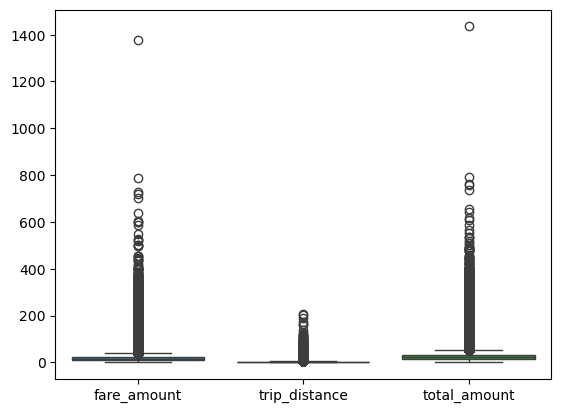

In [93]:
#Delete this record
df=df[~(df['total_amount']>12000)]
df.shape

sns.boxplot(df[['fare_amount','trip_distance','total_amount']])

In [94]:
# Do any columns need standardising?

 #trip_distance , fare_amount, total_amount
df_std=df.copy()
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
cols_to_scale=['trip_distance','fare_amount','total_amount']
df_std[cols_to_scale]=scalar.fit_transform(df_std[cols_to_scale])
df_std.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2023-01-30 18:08:29   2023-01-30 18:52:55              1.0   
1         2  2023-01-30 18:29:29   2023-01-30 18:42:25              1.0   
2         2  2023-01-30 18:45:36   2023-01-30 19:04:29              1.0   
3         2  2023-01-30 18:58:11   2023-01-30 19:08:49              1.0   
4         2  2023-01-30 18:46:23   2023-01-30 18:52:18              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0       0.087820         2.0                  N           132           162   
1       0.010935         1.0                  N           162           113   
2       0.018062         1.0                  N           161           261   
3       0.008445         1.0                  N           234           231   
4       0.004589         1.0                  N           170           161   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             1  ...      0.5       12.00          6.55   
1             1  ...      0.5        3.10          0.00   
2             1  ...      0.5        5.26          0.00   
3             1  ...      0.5        3.58          0.00   
4             1  ...      0.5        0.15          0.00   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0      0.068192                   2.5         1.25   
1                    1.0      0.015897                   2.5         0.00   
2                    1.0      0.021308                   2.5         0.00   
3                    1.0      0.014280                   2.5         0.00   
4                    1.0      0.008960                   2.5         0.00   

   Date_of_journey  Month_of_journey  Hour_of_journey  
0               30                 1               18  
1               30                 1               18  
2               30                 1               18  
3               30                 1               18  
4               30                 1               18  

[5 rows x 22 columns]

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [96]:
df.columns.tolist()

df.dtypes
df['VendorID']=df['VendorID'].astype('category')
df['passenger_count']=df['passenger_count'].astype('int')
df['RatecodeID']=df['RatecodeID'].astype('category')       
df['store_and_fwd_flag']=df['store_and_fwd_flag'].astype('category')
df['payment_type']=df['payment_type'].astype('category')

df['Date_of_journey']=df['Date_of_journey'].astype('category')
df['Month_of_journey']=df['Month_of_journey'].astype('category')
df['Hour_of_journey']=df['Hour_of_journey'].astype('category')


#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

<Axes: xlabel='Hour_of_journey', ylabel='Count'>

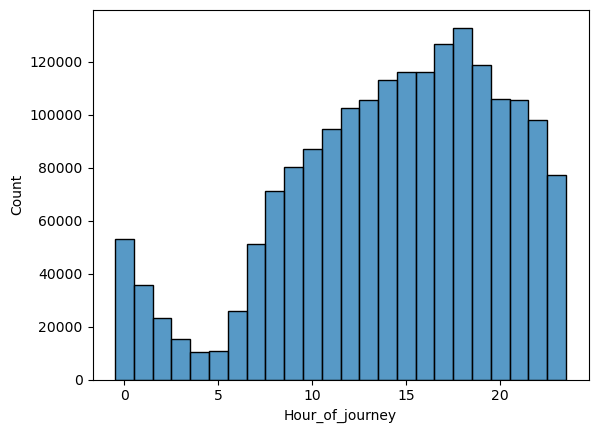

In [101]:
# Find and show the hourly trends in taxi pickups

sns.histplot(x=df['Hour_of_journey'])
#3PM to 7PM seems the busiest time of the day


<Axes: xlabel='Day_of_week', ylabel='count'>

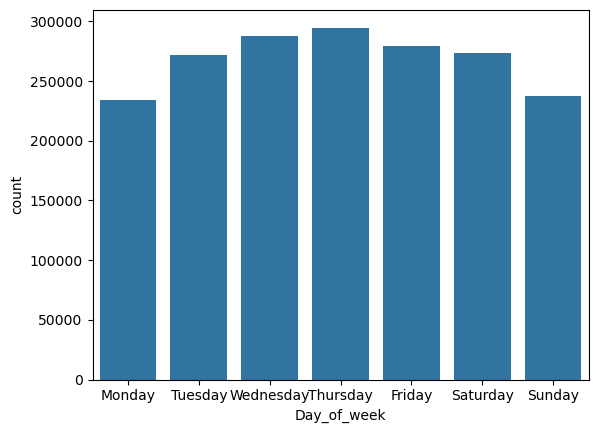

In [102]:
# Find and show the daily trends in taxi pickups (days of the week)
df['Day_of_week']=df['tpep_pickup_datetime'].dt.day_name()
df['Day_of_week'].value_counts()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(x=df['Day_of_week'],order=day_order)

#Wed, Thu,Fri seems to be the busiest days ; slowly tapering from saturday onwards and picking up again on tuesdays

<Axes: xlabel='Month_of_journey', ylabel='Count'>

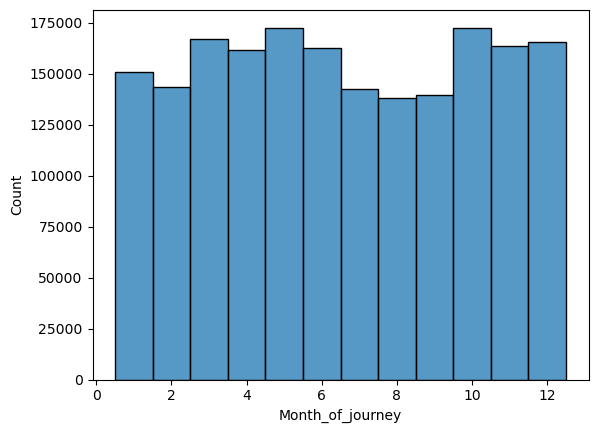

In [103]:
# Show the monthly trends in pickups
sns.histplot(df['Month_of_journey'])
#May and Oct seems to be the busiest months in 2023

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [106]:
# Analyse the above parameters  
df[['fare_amount','tip_amount','total_amount','trip_distance']].min()
print("df:",df.shape)
df_without_zeros=df[~((df['fare_amount']==0)|(df['tip_amount']==0)|(df['total_amount']==0)|(df['trip_distance']==0))]
print("df_without_zeros:",df_without_zeros.shape)

df: (1879064, 23)
df_without_zeros: (1454881, 23)


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [109]:
# Create a df with non zero entries for the selected parameters.
# It is better to drop such cases as they may skew the analysis when we see the data holistically. Hence, they have been dropped earlier
df_without_zeros[df_without_zeros['trip_distance']==0]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee, Date_of_journey, Month_of_journey, Hour_of_journey, Day_of_week]
Index: []

[0 rows x 23 columns]

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

Month_of_journey
10    4091000.56
5     4071688.10
11    3840285.64
3     3807632.83
6     3804901.15
12    3751905.05
4     3681310.99
1     3316876.22
9     3300959.88
7     3216423.21
2     3161578.51
8     3103124.67
Name: total_amount, dtype: float64


<Axes: xlabel='Month_of_journey', ylabel='total_amount'>

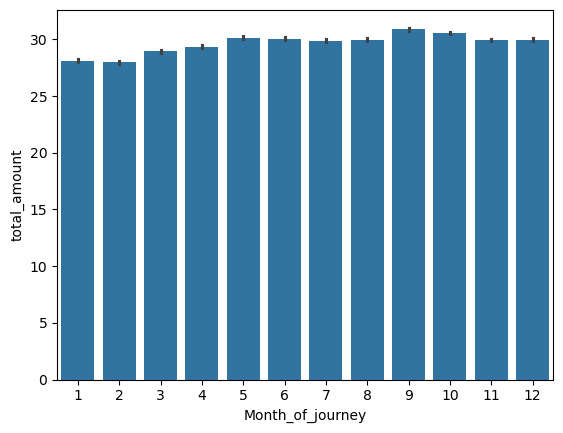

In [111]:
# Group data by month and analyse monthly revenue
print(df_without_zeros.groupby(['Month_of_journey'])['total_amount'].sum().sort_values(ascending=False))
sns.barplot(data=df_without_zeros,x='Month_of_journey',y='total_amount')          

#Revenue is highest in the months of Oct and May as expected since they were the busiest months in 2023


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [113]:
# Calculate proportion of each quarter
def assign_quarter(month):
    if((month==1)|(month==2)|(month==3)):
        return("Q1")
    if((month==4)|(month==5)|(month==6)):
        return("Q2")
    if((month==7)|(month==8)|(month==9)):
        return("Q3")
    else:
        return("Q4")
        
df_without_zeros['Quarter_of_year']=df_without_zeros['Month_of_journey'].apply(lambda x:assign_quarter(x))
df_without_zeros['Quarter_of_year'].unique()


array(['Q1', 'Q4', 'Q3', 'Q2'], dtype=object)

Quarter_of_year
Q1    23.839256
Q2    26.786836
Q3    22.296694
Q4    27.077213
Name: total_amount, dtype: float64


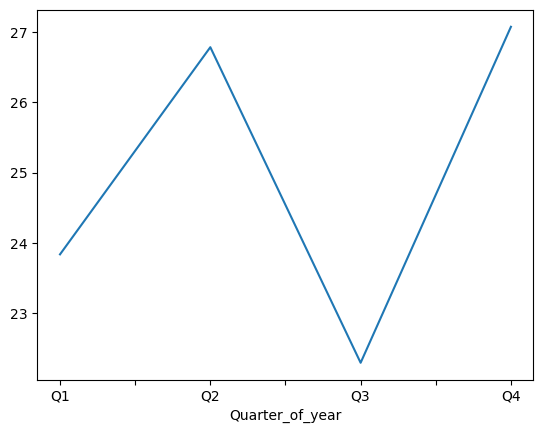

In [114]:
total_rev=df_without_zeros['total_amount'].sum()
(df_without_zeros.groupby(['Quarter_of_year'])['total_amount'].sum()/total_rev*100).plot()
print(df_without_zeros.groupby(['Quarter_of_year'])['total_amount'].sum()/total_rev*100)

#Q2 and Q4 are busiest quarters of the year - taking up approx 54% of the total revenue for the year

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

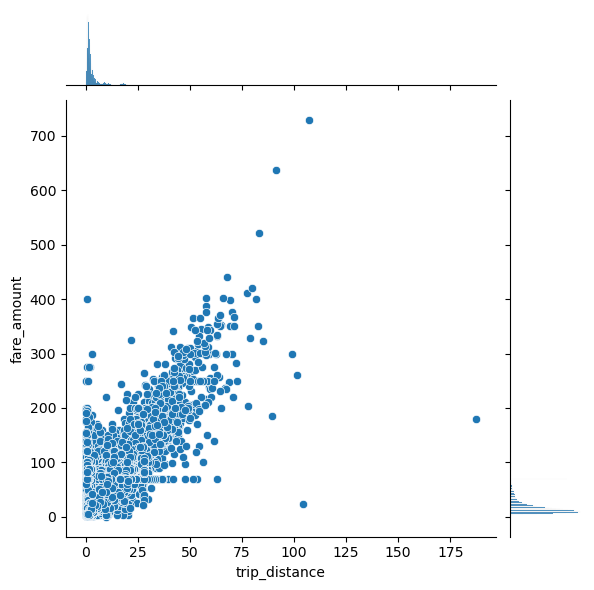

In [116]:
# Show how trip fare is affected by distance
sns.jointplot(x='trip_distance',y='fare_amount',data=df_without_zeros)

In [117]:
df_without_zeros[['trip_distance','fare_amount']].corr().iloc[0,1]*100

94.7841825377302

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

<Axes: >

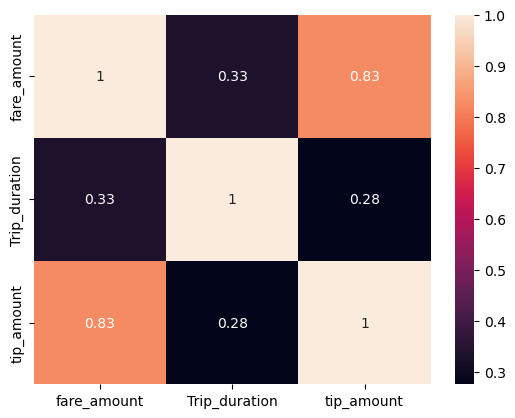

In [119]:
# Show relationship between fare and trip duration
df_without_zeros['Trip_duration']=(df_without_zeros['tpep_dropoff_datetime']-df_without_zeros['tpep_pickup_datetime']).dt.total_seconds()/60
sns.heatmap(df_without_zeros[['fare_amount','Trip_duration','tip_amount']].corr(),annot=True)

<Axes: xlabel='passenger_count', ylabel='fare_amount'>

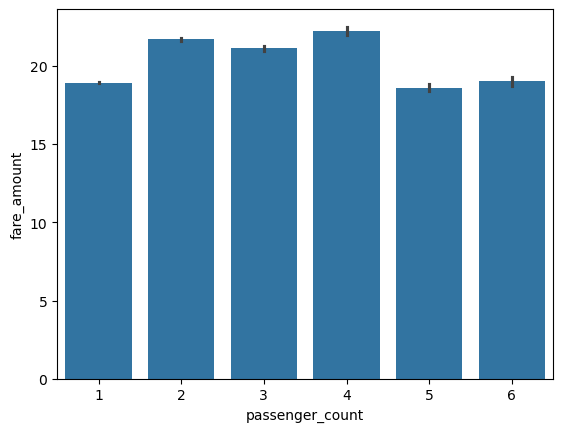

In [120]:
# Show relationship between fare and number of passengers

sns.barplot(x='passenger_count',y='fare_amount',data=df_without_zeros)

#fare_count seems to be slightly higher for 2-4 passengers

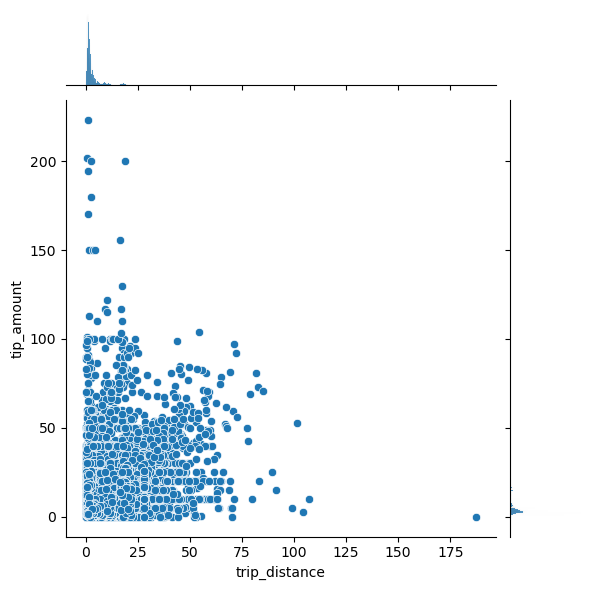

In [121]:
# Show relationship between tip and trip distance

sns.jointplot(x='trip_distance',y='tip_amount',data=df_without_zeros) 

#79%correlation

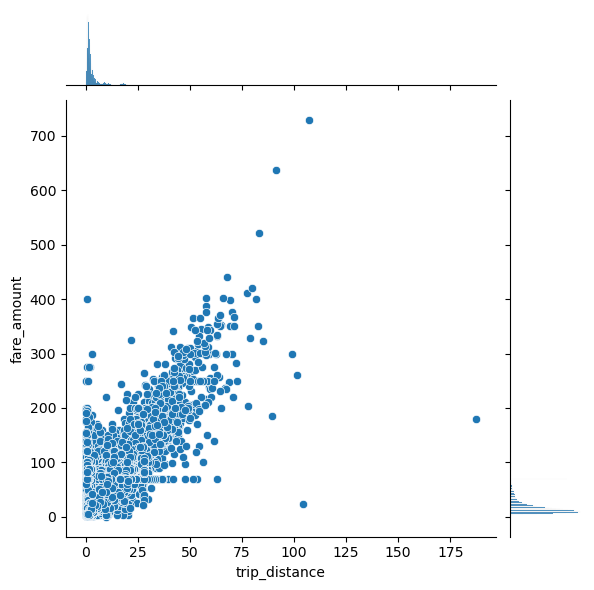

In [122]:
# Relationship between trip distance and fare amount

sns.jointplot(x='trip_distance',y='fare_amount',data=df_without_zeros) 

In [123]:
df_without_zeros[['trip_distance','fare_amount','tip_amount']].corr() #79%correlation

trip_distance  fare_amount  tip_amount
trip_distance       1.000000     0.947842    0.795247
fare_amount         0.947842     1.000000    0.826286
tip_amount          0.795247     0.826286    1.000000

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

<Axes: ylabel='payment_type'>

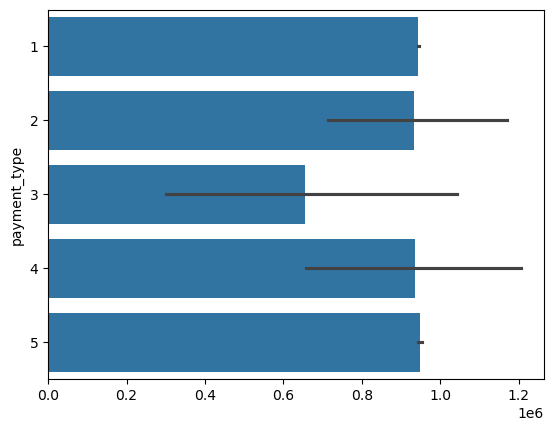

In [125]:
# Analyse the distribution of different payment types (payment_type).
sns.barplot(df_without_zeros['payment_type'])

#Most used payment type is 1 or 4
#Least is no charge =3
# there is lot of variability in the data for payment type 2 and 4




In [126]:
df_without_zeros['payment_type'].value_counts()

payment_type
1    1415746
5      39083
2         23
4         19
3         10
Name: count, dtype: int64

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [131]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [133]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file(r"\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\taxi_zones\taxi_zones.shp")
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

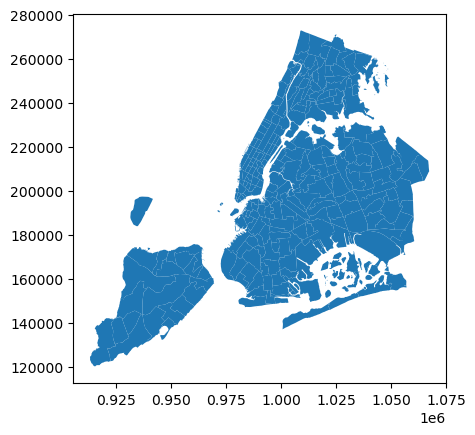

In [135]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [138]:
# Merge zones and trip records using locationID and PULocationID
print(df_without_zeros.shape)
print(zones.shape)
zones_deduped=zones.drop_duplicates(subset=['LocationID'],keep='first') #removing duplicate rows by 'LocationID' Ex:103
df_loc_merged=pd.merge(df_without_zeros,zones_deduped,how='left',left_on='PULocationID',right_on='LocationID')
print(df_without_zeros.shape)
print(df_loc_merged.shape)


(1454881, 25)
(263, 7)
(1454881, 25)
(1454881, 32)


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [140]:
# Group data by location and calculate the number of trips
Number_of_trips=df_loc_merged.groupby(['LocationID']).size()
Number_of_trips=pd.DataFrame(Number_of_trips)
Number_of_trips.sort_values(by=0,ascending=False) #Lot of trips are coming from locations like 237, 161, 236, 132, 162
Number_of_trips.rename(columns={0:'Number_of_trips'},inplace=True)
Number_of_trips


Number_of_trips
LocationID                 
1.0                      35
2.0                       2
4.0                    1698
6.0                       1
7.0                     368
...                     ...
259.0                     1
260.0                   105
261.0                  7147
262.0                 20616
263.0                 28863

[232 rows x 1 columns]

In [141]:
df_loc_merged[df_loc_merged['LocationID'].isin([237,161,236,132,162])]
# 132=JFK Airport	
# 162=Midtown East	
# 161=Midtown Center
# 237=Upper East Side South	
# 236=Upper East Side North	

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0              1  2023-01-30 18:08:29   2023-01-30 18:52:55                1   
1              2  2023-01-30 18:29:29   2023-01-30 18:42:25                1   
2              2  2023-01-30 18:45:36   2023-01-30 19:04:29                1   
6              2  2023-01-30 18:57:13   2023-01-30 19:07:20                1   
7              1  2023-01-30 18:31:39   2023-01-30 18:51:29                1   
...          ...                  ...                   ...              ...   
1454852        1  2023-09-04 19:46:52   2023-09-04 19:51:56                1   
1454858        2  2023-09-03 12:55:35   2023-09-03 13:14:10                4   
1454863        1  2023-09-02 22:47:49   2023-09-02 23:04:37                2   
1454875        2  2023-09-01 16:30:50   2023-09-01 16:30:53                1   
1454877        1  2023-09-01 14:19:37   2023-09-01 14:23:17                1   

         trip_distance RatecodeID store_and_fwd_flag  PULocationID  \
0                18.00        2.0                  N           132   
1                 2.25        1.0                  N           162   
2                 3.71        1.0                  N           161   
6                 1.38        1.0                  N           237   
7                 3.00        1.0                  N           162   
...                ...        ...                ...           ...   
1454852           1.50        1.0                  N           237   
1454858           1.85        1.0                  N           161   
1454863           2.36        1.0                  N           161   
1454875           1.60        5.0                  N           236   
1454877           0.80        1.0                  N           236   

         DOLocationID payment_type  ...  Day_of_week  Quarter_of_year  \
0                 162            1  ...       Monday               Q1   
1                 113            1  ...       Monday               Q1   
2                 261            1  ...       Monday               Q1   
6                 161            1  ...       Monday               Q1   
7                 158            1  ...       Monday               Q1   
...               ...          ...  ...          ...              ...   
1454852           263            1  ...       Monday               Q3   
1454858           234            1  ...       Sunday               Q3   
1454863           142            1  ...     Saturday               Q3   
1454875           264            1  ...       Friday               Q3   
1454877           263            1  ...       Friday               Q3   

         Trip_duration  OBJECTID  Shape_Leng  Shape_Area  \
0            44.433333     132.0    0.245479    0.002038   
1            12.933333     162.0    0.035270    0.000048   
2            18.883333     161.0    0.035804    0.000072   
6            10.116667     237.0    0.042213    0.000096   
7            19.833333     162.0    0.035270    0.000048   
...                ...       ...         ...         ...   
1454852       5.066667     237.0    0.042213    0.000096   
1454858      18.583333     161.0    0.035804    0.000072   
1454863      16.800000     161.0    0.035804    0.000072   
1454875       0.050000     236.0    0.044252    0.000103   
1454877       3.666667     236.0    0.044252    0.000103   

                          zone  LocationID    borough  \
0                  JFK Airport       132.0     Queens   
1                 Midtown East       162.0  Manhattan   
2               Midtown Center       161.0  Manhattan   
6        Upper East Side South       237.0  Manhattan   
7                 Midtown East       162.0  Manhattan   
...                        ...         ...        ...   
1454852  Upper East Side South       237.0  Manhattan   
1454858         Midtown Center       161.0  Manhattan   
1454863         Midtown Center       161.0  Manhattan   
1454875  Upper East Side North       2

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [143]:
# Merge trip counts back to the zones GeoDataFrame
print(zones_deduped.shape)
zones_deduped=pd.merge(zones_deduped,Number_of_trips,how='left',left_on=['LocationID'],right_index=True)
print(zones_deduped.shape)

(260, 7)
(260, 8)


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

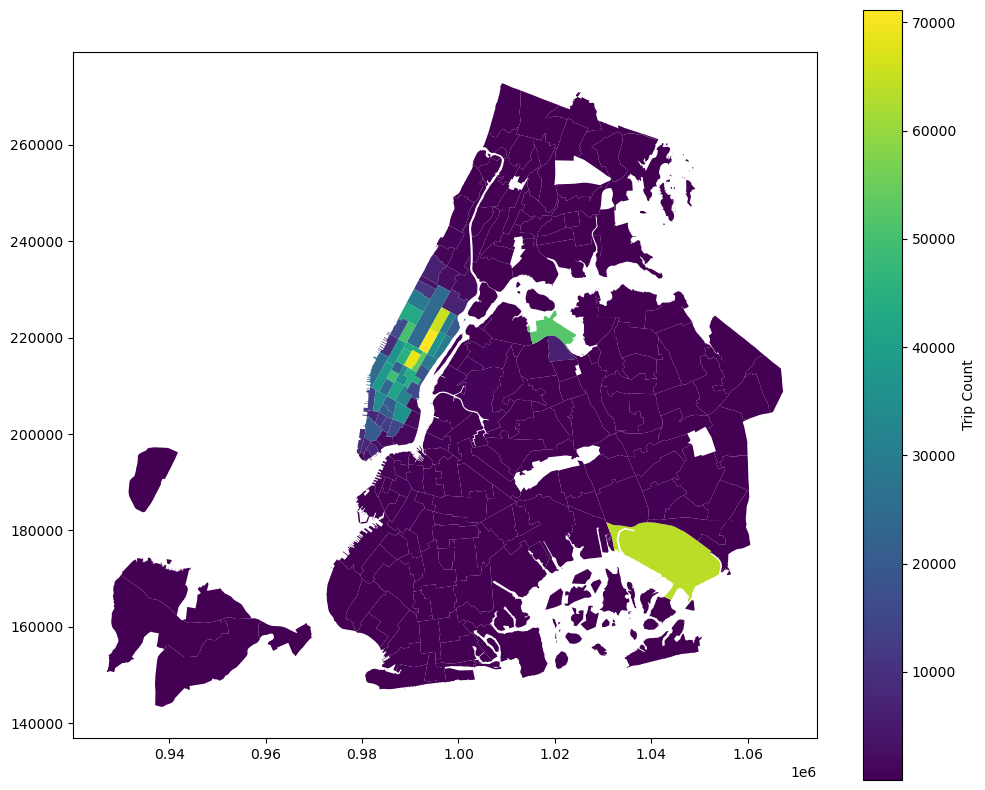

In [147]:
# Define figure and axis
# Define figure and axis
fig, ax = plt.subplots(1,1,figsize = (12, 10))
# Plot the map and display it
zones_deduped.plot(column='Number_of_trips',ax=ax,legend=True,legend_kwds = {'label': "Trip Count", 'orientation': "vertical"})
plt.show()

# Plot the map and display it



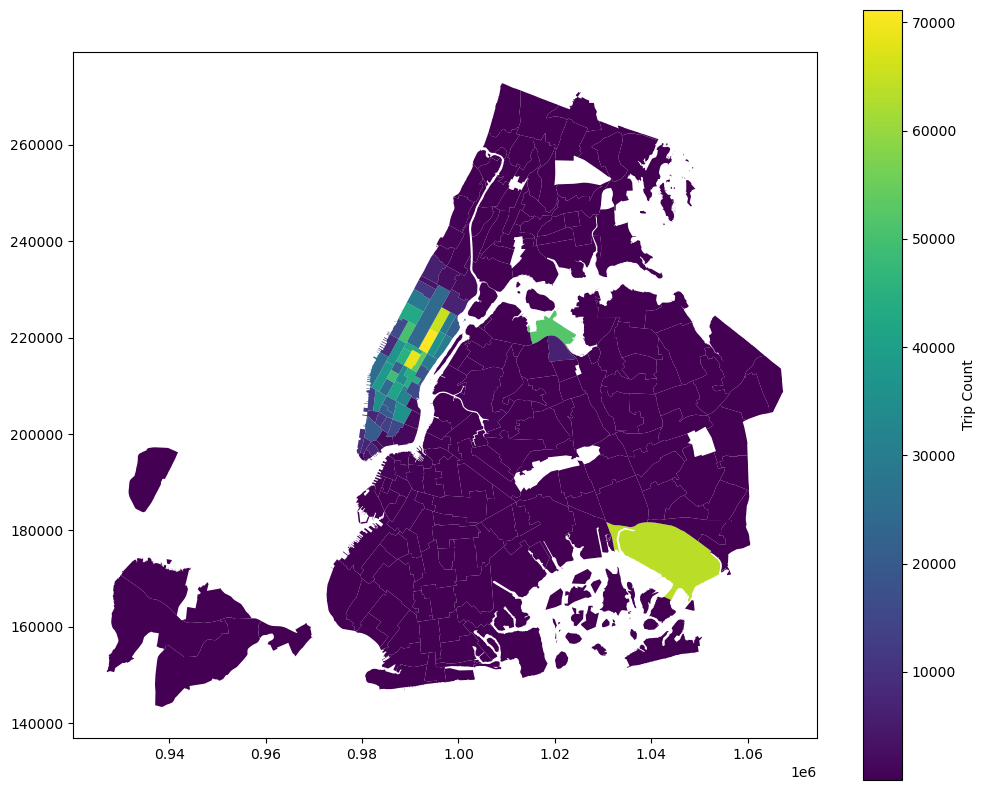

In [148]:
# can you try displaying the zones DF sorted by the number of trips?
fig, ax = plt.subplots(1,1,figsize = (12, 10))
zz=zones_deduped.sort_values('Number_of_trips',ascending=False).reset_index()
zz.plot(column='Number_of_trips',ax=ax,legend=True,legend_kwds = {'label': "Trip Count", 'orientation': "vertical"})
plt.show()

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [157]:
# Find routes which have the slowest speeds at different times of the day
df_loc_merged_new=pd.merge(df_loc_merged,zones_deduped[['LocationID','zone']],how='left',left_on='DOLocationID',right_on='LocationID')
print(df_without_zeros.shape)
print(df_loc_merged_new.shape)


(1454881, 25)
(1454881, 34)


In [158]:
del(df_loc_merged_new['LocationID_x'])
del(df_loc_merged_new['LocationID_y'])
df_loc_merged_new.rename(columns={'zone_x':'Pickup_zone','zone_y':'Dropoff_zone'},inplace=True)
df_loc_merged_new.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee',
       'Date_of_journey', 'Month_of_journey', 'Hour_of_journey', 'Day_of_week',
       'Quarter_of_year', 'Trip_duration', 'OBJECTID', 'Shape_Leng',
       'Shape_Area', 'Pickup_zone', 'borough', 'geometry', 'Dropoff_zone'],
      dtype='object')

In [159]:
df_loc_merged_new['Route']=df_loc_merged_new['Pickup_zone']+" - "+df_loc_merged_new['Dropoff_zone']
df_loc_merged_new['Route']

0                            JFK Airport - Midtown East
1                Midtown East - Greenwich Village North
2                   Midtown Center - World Trade Center
3                       Union Sq - TriBeCa/Civic Center
4                          Murray Hill - Midtown Center
                               ...                     
1454876        Hamilton Heights - Upper West Side North
1454877          Upper East Side North - Yorkville West
1454878    Midtown South - Penn Station/Madison Sq West
1454879            Clinton East - Upper East Side North
1454880                Yorkville East - Lenox Hill East
Name: Route, Length: 1454881, dtype: object

In [160]:
df_loc_merged_new['avg_speed']=df_loc_merged_new['trip_distance']/df_loc_merged_new['Trip_duration']
Avg_trip_duration=df_loc_merged_new.groupby(['Route'])['avg_speed'].mean().reset_index()
#Avg_trip_duration.rename(columns={'Trip_duration':'Avg_trip_duration_for_the_hour'},inplace=True)
Avg_trip_duration=Avg_trip_duration[(Avg_trip_duration['avg_speed']>0)&(~pd.isnull(Avg_trip_duration['avg_speed']))]
Avg_trip_duration.sort_values(['avg_speed'],ascending=True)[:10]

Route  avg_speed
1650                      Clinton East - Pelham Bay Park   0.002132
9059                             Red Hook - Clinton West   0.002245
1221         Central Harlem North - Flatbush/Ditmas Park   0.003228
2742     East Flatbush/Farragut - East Flatbush/Farragut   0.004839
545                  Bensonhurst West - Bensonhurst West   0.005151
5025                        Hudson Sq - Sunset Park East   0.005429
11513                Upper West Side South - Marble Hill   0.005823
7357   Meatpacking/West Village West - South Williams...   0.008740
8402                Murray Hill - Marine Park/Mill Basin   0.012212
11332                   Upper West Side North - Flushing   0.014035

In [161]:
# Find routes which have the slowest speeds at different times of the day
df_loc_merged_new['avg_speed']=df_loc_merged_new['trip_distance']/df_loc_merged_new['Trip_duration']
Avg_trip_duration_hour=df_loc_merged_new.groupby(['Hour_of_journey','Route'])['avg_speed'].mean().reset_index()
#Avg_trip_duration.rename(columns={'Trip_duration':'Avg_trip_duration_for_the_hour'},inplace=True)
Avg_trip_duration_hour=Avg_trip_duration_hour[(Avg_trip_duration_hour['avg_speed']>0)&(~pd.isnull(Avg_trip_duration_hour['avg_speed']))]
Avg_trip_duration_hour.sort_values(['avg_speed'],ascending=True)[:10]

Hour_of_journey                                          Route  \
128995              10                    Central Park - Baisley Park   
129141              10                          Chinatown - Chinatown   
58791                4                    Midtown East - Midtown East   
79265                6              East Elmhurst - LaGuardia Airport   
293830              23      Alphabet City - West Chelsea/Hudson Yards   
62344                4  Upper East Side South - Upper West Side North   
14421                1                 Clinton East - Pelham Bay Park   
33920                2                        Murray Hill - Hudson Sq   
239242              18                             SoHo - Cobble Hill   
226166              17                        Red Hook - Clinton West   

        avg_speed  
128995   0.000371  
129141   0.000991  
58791    0.001080  
79265    0.001429  
293830   0.001849  
62344    0.002006  
14421    0.002132  
33920    0.002193  
239242   0.002215  
226166   0.002245

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

<Axes: xlabel='Hour_of_journey', ylabel='Number_of_trips'>

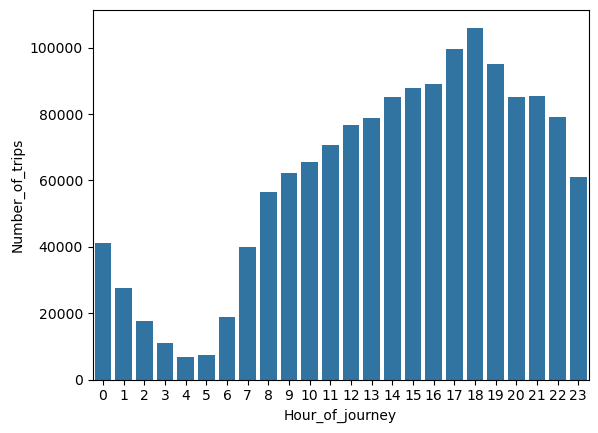

In [164]:
# Visualise the number of trips per hour and find the busiest hour
df_loc_merged_speed=df_loc_merged_new.copy()
no_of_trips=df_loc_merged_speed.groupby(['Hour_of_journey']).size().reset_index()
no_of_trips.rename(columns={0:'Number_of_trips'},inplace=True)
sns.barplot(x='Hour_of_journey',y='Number_of_trips',data=no_of_trips)

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [167]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction =.05

# Fill in the value of your sampling fraction and use that to scale up the numbers
no_of_trips['Number_of_trips']=no_of_trips['Number_of_trips']/sample_fraction
no_of_trips.sort_values(['Number_of_trips'],ascending=False).iloc[0:5,:]
#peak timings are from 3PM to 7PM with 6PM being the peak


Hour_of_journey  Number_of_trips
18              18        2121380.0
17              17        1994580.0
19              19        1900760.0
16              16        1780220.0
15              15        1758100.0

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

<Axes: xlabel='Day_of_week'>

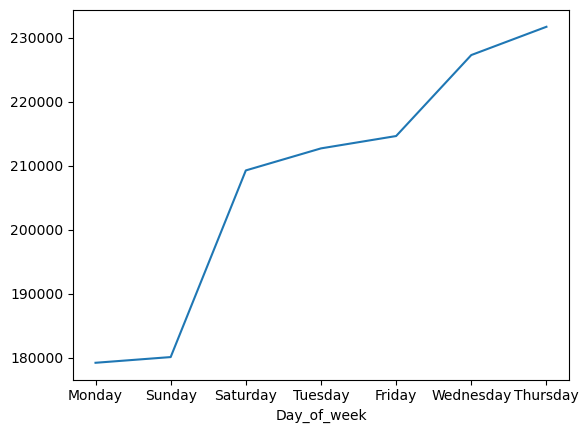

In [169]:
# Compare traffic trends for the week days and weekends
df_loc_merged_speed.groupby(['Day_of_week'])['Hour_of_journey'].size().sort_values().plot()
#traffic trends show sunday<monday<tues<wed<thu<fri<sat

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [172]:
# Find top 10 pickup and dropoff zones
#Pick up zones
df_loc_merged_speed.groupby(['Pickup_zone']).size().sort_values(ascending=False).reset_index().iloc[0:10,:]


Pickup_zone      0
0         Upper East Side South  71134
1                Midtown Center  68851
2         Upper East Side North  65377
3                   JFK Airport  63903
4                  Midtown East  53554
5             LaGuardia Airport  51983
6           Lincoln Square East  50226
7  Penn Station/Madison Sq West  49224
8     Times Sq/Theatre District  45170
9                   Murray Hill  44161

In [173]:
df_loc_merged_speed.groupby(['Hour_of_journey','Pickup_zone']).size().sort_values(ascending=False).reset_index().iloc[0:10,:]

Hour_of_journey            Pickup_zone     0
0              18         Midtown Center  6185
1              17         Midtown Center  5904
2              18  Upper East Side South  5502
3              17  Upper East Side South  5494
4              19         Midtown Center  5409
5              15  Upper East Side North  5389
6              14  Upper East Side South  5297
7              15  Upper East Side South  5256
8              16         Midtown Center  5232
9              16  Upper East Side South  5084

In [174]:
df_loc_merged_speed.groupby(['Dropoff_zone']).size().sort_values(ascending=False).reset_index().iloc[0:10,:]

Dropoff_zone      0
0      Upper East Side North  69157
1      Upper East Side South  63969
2             Midtown Center  56840
3                Murray Hill  44130
4      Upper West Side South  43923
5        Lincoln Square East  42570
6               Midtown East  42386
7            Lenox Hill West  40849
8  Times Sq/Theatre District  40337
9               East Chelsea  37089

In [175]:
df_loc_merged_speed.groupby(['Hour_of_journey','Dropoff_zone']).size().sort_values(ascending=False).reset_index().iloc[0:10,:]

Hour_of_journey           Dropoff_zone     0
0              18  Upper East Side North  5270
1              18  Upper East Side South  5199
2              14  Upper East Side North  5094
3              17  Upper East Side North  5076
4              15  Upper East Side North  5047
5               8         Midtown Center  4868
6              17  Upper East Side South  4855
7              12  Upper East Side South  4813
8              15  Upper East Side South  4803
9              16  Upper East Side North  4791

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [177]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

#df_loc_merged_speed
df_loc_merged_speed_2=df_loc_merged_speed.copy()
df_loc_merged_speed_2.rename(columns={'Pickup_zone':'Pick_up_zone','Dropoff_zone':'Drop_off_zone'},inplace=True)
top_pickup_zones=df_loc_merged_speed_2.groupby(['Pick_up_zone']).size().sort_values(ascending=False).reset_index().rename(columns={0:'Pickups'})
top_dropoff_zones=df_loc_merged_speed_2.groupby(['Drop_off_zone']).size().sort_values(ascending=False).reset_index().rename(columns={0:'Dropoffs'})
all_zones=pd.merge(top_pickup_zones,top_dropoff_zones,how='outer',left_on='Pick_up_zone',right_on='Drop_off_zone')
all_zones['ratio']=all_zones['Pickups']/all_zones['Dropoffs']
all_zones.sort_values(['ratio']).reset_index()[:10]

index             Pick_up_zone  Pickups            Drop_off_zone  Dropoffs  \
0    141                  Madison      1.0                  Madison     125.0   
1    165           Newark Airport     35.0           Newark Airport    4311.0   
2     35          Cambria Heights      1.0          Cambria Heights     109.0   
3     12  Bay Terrace/Fort Totten      1.0  Bay Terrace/Fort Totten      88.0   
4    157                  Midwood      3.0                  Midwood     243.0   
5     16                Bellerose      1.0                Bellerose      78.0   
6    252       Woodlawn/Wakefield      1.0       Woodlawn/Wakefield      76.0   
7     15             Bedford Park      1.0             Bedford Park      66.0   
8    163       Murray Hill-Queens      2.0       Murray Hill-Queens     131.0   
9      8               Bath Beach      1.0               Bath Beach      64.0   

      ratio  
0  0.008000  
1  0.008119  
2  0.009174  
3  0.011364  
4  0.012346  
5  0.012821  
6  0.013158  
7  0.015152  
8  0.015267  
9  0.015625

In [178]:
all_zones.sort_values(['ratio'],ascending=False).reset_index()[:10]

index                      Pick_up_zone  Pickups  \
0     66                     East Elmhurst   6453.0   
1    120                       JFK Airport  63903.0   
2    130                 LaGuardia Airport  51983.0   
3    179      Penn Station/Madison Sq West  49224.0   
4    200  Saint Michaels Cemetery/Woodside     11.0   
5    105           Greenwich Village South  20407.0   
6     40                      Central Park  24368.0   
7    242                      West Village  34695.0   
8    154                      Midtown East  53554.0   
9     95                  Garment District  21780.0   

                      Drop_off_zone  Dropoffs      ratio  
0                     East Elmhurst     488.0  13.223361  
1                       JFK Airport   15102.0   4.231426  
2                 LaGuardia Airport   20208.0   2.572397  
3      Penn Station/Madison Sq West   30163.0   1.631933  
4  Saint Michaels Cemetery/Woodside       7.0   1.571429  
5           Greenwich Village South   14731.0   1.385310  
6                      Central Park   17604.0   1.384231  
7                      West Village   26020.0   1.333397  
8                      Midtown East   42386.0   1.263483  
9                  Garment District   17855.0   1.219826

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [180]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones


#df_loc_merged_speed_2[df_loc_merged_speed_2['Hour_of_journey'].isin([23,0,1,2,3,4,5])]

top_pickup_zones_night=df_loc_merged_speed_2[df_loc_merged_speed_2['Hour_of_journey'].isin([23,0,1,2,3,4,5])].groupby(['Pick_up_zone']).size().sort_values(ascending=False).reset_index().rename(columns={0:'Pickups'})
top_dropoff_zones_night=df_loc_merged_speed_2[df_loc_merged_speed_2['Hour_of_journey'].isin([23,0,1,2,3,4,5])].groupby(['Drop_off_zone']).size().sort_values(ascending=False).reset_index().rename(columns={0:'Dropoffs'})
top_pickup_zones_night.sort_values(['Pickups'],ascending=False)[:10]



Pick_up_zone  Pickups
0                  East Village    13281
1                  West Village    10789
2                   JFK Airport     9536
3               Lower East Side     8309
4                  Clinton East     8233
5       Greenwich Village South     7473
6     Times Sq/Theatre District     6016
7  Penn Station/Madison Sq West     5459
8                 Midtown South     4938
9                  East Chelsea     4864

In [181]:
top_dropoff_zones_night.sort_values(['Dropoffs'],ascending=False)[:10]

Drop_off_zone  Dropoffs
0           East Village      6890
1           Clinton East      5281
2            Murray Hill      5155
3               Gramercy      4925
4        Lenox Hill West      4661
5           East Chelsea      4640
6         Yorkville West      4428
7           West Village      4192
8  Upper West Side South      3877
9  Upper East Side North      3808

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [183]:
# Filter for night hours (11 PM to 5 AM)
night_hours=df_loc_merged_speed_2[df_loc_merged_speed_2['Hour_of_journey'].isin([23,0,1,2,3,4,5])]
day_hours=df_loc_merged_speed_2[~(df_loc_merged_speed_2['Hour_of_journey'].isin([23,0,1,2,3,4,5]))]
day_revenue_share=(day_hours['total_amount'].sum()/df_loc_merged_speed_2['total_amount'].sum())*100
night_revenue_share=(night_hours['total_amount'].sum()/df_loc_merged_speed_2['total_amount'].sum())*100
print("Day Revenue Share %: ",day_revenue_share)
print("Night Revenue Share %: ",night_revenue_share)


Day Revenue Share %:  87.93480616255538
Night Revenue Share %:  12.06519383744456


In [184]:
#66% of the revenue is coming from the peak hours
peak_hours=df_loc_merged_speed_2[~(df_loc_merged_speed_2['Hour_of_journey'].isin([15,16,17,18,19]))]
(peak_hours['total_amount'].sum()/df_loc_merged_speed_2['total_amount'].sum())*100

66.29241033466194

In [185]:
#54% of the revenue is coming from 3 days of the week
peak_days=df_loc_merged_speed_2[~(df_loc_merged_speed_2['Day_of_week'].isin(['Wednesday','Thursday','Friday']))]
(peak_days['total_amount'].sum()/df_loc_merged_speed_2['total_amount'].sum())*100

53.55442474066665

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [188]:
# Analyse the fare per mile per passenger for different passenger counts
df_loc_merged_speed_2['avg_fare_per_mile']=df_loc_merged_speed_2['fare_amount']/df_loc_merged_speed_2['trip_distance']
cost_per_passenger=df_loc_merged_speed_2.groupby(['passenger_count'])['avg_fare_per_mile'].mean().reset_index()
cost_per_passenger['avg_fare_per_mile_per_passenger']=cost_per_passenger['avg_fare_per_mile']/cost_per_passenger['passenger_count']
cost_per_passenger


passenger_count  avg_fare_per_mile  avg_fare_per_mile_per_passenger
0                1           9.273751                         9.273751
1                2          10.016138                         5.008069
2                3          10.143798                         3.381266
3                4          16.122641                         4.030660
4                5           7.961443                         1.592289
5                6           7.710954                         1.285159

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [190]:
# Compare the average fare per mile for different days and for different times of the day
#avg_fare_by_hours_days=df_loc_merged_speed_2.groupby(['Day_of_week','Hour_of_journey']).agg({'fare_amount':'sum','trip_distance':'sum'}).reset_index()
df_loc_merged_speed_2.groupby(['Day_of_week','Hour_of_journey'])['avg_fare_per_mile'].mean().reset_index().sort_values('avg_fare_per_mile',ascending=False)

Day_of_week Hour_of_journey  avg_fare_per_mile
148   Wednesday               4          25.525567
149   Wednesday               5          20.028910
54     Saturday               6          18.545916
53     Saturday               5          18.093174
52     Saturday               4          16.694761
..          ...             ...                ...
146   Wednesday               2           6.519400
144   Wednesday               0           6.472079
76       Sunday               4           6.092715
99     Thursday               3           5.989889
28       Monday               4           5.387495

[168 rows x 3 columns]

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [192]:
# Compare fare per mile for different vendors
df_loc_merged_speed_2.groupby(['VendorID'])['avg_fare_per_mile'].mean()
#there is lot of variation in the avg fare for vendor 2 , mean is 10, but median is 7, so the avg fare is skewed

VendorID
1     7.925490
2    10.041331
Name: avg_fare_per_mile, dtype: float64

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [194]:
# Defining distance tiers
# Defining distance tiers
def dist_tier(d):
    if(d<=2):
        return("Tier 1")
    elif((d>2) and (d<=5)):
        return("Tier 2")
    else:
        return("Tier 3")
df_loc_merged_speed_2['Distance_tier']=df_loc_merged_speed_2['trip_distance'].apply(dist_tier)
df_loc_merged_speed_2['Distance_tier'].value_counts()


Distance_tier
Tier 1    795214
Tier 2    414793
Tier 3    244874
Name: count, dtype: int64

In [195]:
Tier_avg_fare=df_loc_merged_speed_2.groupby(['Distance_tier'])['avg_fare_per_mile'].mean().reset_index()
Tier_avg_fare.sort_values(['avg_fare_per_mile'],ascending=False)

Distance_tier  avg_fare_per_mile
0        Tier 1          12.615298
1        Tier 2           6.491142
2        Tier 3           4.483660

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [198]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
df_loc_merged_speed_2['tip_percentage']=df_loc_merged_speed_2['tip_amount']/df_loc_merged_speed_2['fare_amount']
tip_percents=df_loc_merged_speed_2.groupby(['Distance_tier'])['tip_percentage'].mean().reset_index()
tip_percents.sort_values(['tip_percentage'],ascending=False)



Distance_tier  tip_percentage
0        Tier 1        0.287853
2        Tier 3        0.233980
1        Tier 2        0.230648

In [199]:
tip_percents=df_loc_merged_speed_2.groupby(['passenger_count'])['tip_percentage'].mean().reset_index()
tip_percents.sort_values(['tip_percentage'],ascending=False)

passenger_count  tip_percentage
0                1        0.263569
5                6        0.262056
4                5        0.261012
3                4        0.258919
2                3        0.258222
1                2        0.258164

In [200]:
tip_percents=df_loc_merged_speed_2.groupby(['Hour_of_journey'])['tip_percentage'].mean().reset_index()
tip_percents.sort_values(['tip_percentage'],ascending=False)
#tips are higher durung the peak timings or night timings

Hour_of_journey  tip_percentage
17              17        0.306373
18              18        0.274388
19              19        0.273483
3                3        0.272959
16              16        0.270617
4                4        0.264661
20              20        0.264003
2                2        0.263848
21              21        0.262156
1                1        0.260503
22              22        0.259232
0                0        0.257341
23              23        0.256589
5                5        0.256177
10              10        0.254556
11              11        0.254533
13              13        0.253627
12              12        0.253530
9                9        0.251881
14              14        0.251703
15              15        0.250177
6                6        0.249497
8                8        0.248483
7                7        0.247845

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [202]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
tip_percents_less_10per=tip_percents[tip_percents['tip_percentage']<0.25]
tip_percents_less_10per


Hour_of_journey  tip_percentage
6               6        0.249497
7               7        0.247845
8               8        0.248483

In [203]:
tip_percents_greater_25per=tip_percents[tip_percents['tip_percentage']>0.25]
tip_percents_greater_25per

Hour_of_journey  tip_percentage
0                0        0.257341
1                1        0.260503
2                2        0.263848
3                3        0.272959
4                4        0.264661
5                5        0.256177
9                9        0.251881
10              10        0.254556
11              11        0.254533
12              12        0.253530
13              13        0.253627
14              14        0.251703
15              15        0.250177
16              16        0.270617
17              17        0.306373
18              18        0.274388
19              19        0.273483
20              20        0.264003
21              21        0.262156
22              22        0.259232
23              23        0.256589

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [205]:
# See how passenger count varies across hours and days
df_loc_merged_speed_2.groupby(['Hour_of_journey','Day_of_week'])['passenger_count'].mean().sort_values(ascending=False)
df_loc_merged_speed_2.groupby(['Hour_of_journey','Day_of_week'])['passenger_count'].sum().sort_values(ascending=False)
#plt.figure(figsize=(13, 6))
#sns.catplot(data=df_loc_merged_speed_2, x='Hour_of_journey', y='Day_of_week', hue='passenger_count')
#sns.heatmap(data=df_loc_merged_speed_2, x='Hour_of_journey', y='Day_of_week', hue='passenger_count')


Hour_of_journey  Day_of_week
18               Thursday       22833
                 Wednesday      22769
                 Friday         21801
                 Tuesday        21747
17               Thursday       21100
                                ...  
3                Monday           699
4                Wednesday        625
3                Wednesday        565
4                Tuesday          472
3                Tuesday          445
Name: passenger_count, Length: 168, dtype: int32

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [207]:
# How does passenger count vary across zones
df_loc_merged_speed_2.groupby(['Pick_up_zone'])['passenger_count'].mean().sort_values(ascending=False)



Pick_up_zone
Arrochar/Fort Wadsworth    3.000000
Ocean Parkway South        2.666667
Norwood                    2.666667
West Farms/Bronx River     2.333333
Fresh Meadows              2.250000
                             ...   
East Flushing              1.000000
Laurelton                  1.000000
Kingsbridge Heights        1.000000
Bloomfield/Emerson Hill    1.000000
Pelham Bay Park            1.000000
Name: passenger_count, Length: 232, dtype: float64

In [208]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
zones_with_trips=pd.merge(zones_deduped,df_loc_merged_speed_2[['Pick_up_zone','passenger_count']],left_on='zone',right_on='Pick_up_zone',how='right')
zones_with_trips_avg_pass=zones_with_trips.groupby(['Pick_up_zone']).agg({'passenger_count':'sum','Number_of_trips':'sum'}).reset_index()
zones_with_trips_avg_pass['Avg_Passenger_count']=zones_with_trips_avg_pass['Number_of_trips']/zones_with_trips_avg_pass['passenger_count']
zones_with_trips_avg_pass.sort_values('Avg_Passenger_count',ascending=False)



Pick_up_zone  passenger_count  Number_of_trips  \
206        Upper East Side South            94444     5.060046e+09   
138               Midtown Center            93268     4.740460e+09   
205        Upper East Side North            87242     4.274152e+09   
106                  JFK Airport            94254     4.083593e+09   
139                 Midtown East            70200     2.868031e+09   
..                           ...              ...              ...   
96   Heartland Village/Todt Hill                1     1.000000e+00   
95               Hammels/Arverne                1     1.000000e+00   
221                Willets Point                2     1.000000e+00   
90           Green-Wood Cemetery                2     1.000000e+00   
1        Arrochar/Fort Wadsworth                3     1.000000e+00   

     Avg_Passenger_count  
206         53577.209309  
138         50826.223367  
205         48991.909046  
106         43325.412280  
139         40855.141254  
..                   ...  
96              1.000000  
95              1.000000  
221             0.500000  
90              0.500000  
1               0.333333  

[232 rows x 4 columns]

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [211]:
# How often is each surcharge applied?
df_loc_merged_speed_2.groupby(['Hour_of_journey'])['extra'].mean().sort_values(ascending=False) #high during the peak hours
#df_loc_merged_speed_2.columns
#Extra surcharge seems to applied during the peak hours and night timings

Hour_of_journey
17    2.713405
16    2.690676
18    2.690344
19    2.653872
20    1.802057
5     1.798666
23    1.770046
21    1.716718
22    1.690231
4     1.678304
0     1.640023
2     1.539116
1     1.536952
3     1.534643
10    1.025493
14    0.994505
11    0.984767
13    0.983380
9     0.979262
15    0.974723
12    0.971908
6     0.956266
8     0.900388
7     0.895454
Name: extra, dtype: float64

In [212]:
df_loc_merged_speed_2.groupby(['Pick_up_zone'])['extra'].mean().sort_values(ascending=False)
#Airport pickups have highest extras/surcharges

Pick_up_zone
LaGuardia Airport    6.323400
East Elmhurst        4.763904
Rikers Island        3.000000
College Point        2.666667
City Island          2.500000
                       ...   
Mariners Harbor      0.000000
Sheepshead Bay       0.000000
Dyker Heights        0.000000
Madison              0.000000
Pelham Bay Park      0.000000
Name: extra, Length: 232, dtype: float64

In [213]:
df_loc_merged_speed_2.groupby(['Drop_off_zone'])['extra'].mean().sort_values(ascending=False)
#Airport drops have the highest surcharges/extras

Drop_off_zone
LaGuardia Airport                  5.253189
Bay Terrace/Fort Totten            4.008523
Port Richmond                      3.375000
Whitestone                         3.357527
East Elmhurst                      3.239242
                                     ...   
Oakwood                            0.843750
Marine Park/Floyd Bennett Field    0.666667
Newark Airport                     0.485270
Mariners Harbor                    0.250000
Rossville/Woodrow                  0.000000
Name: extra, Length: 255, dtype: float64

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [217]:
# Enhanced Airport Cab Availability
# Ensure a large fleet of cabs at airports, as they are key locations for pickups and drop-offs.

# Peak Hour & Day Coverage
# Increase cab availability between 3 PM – 7 PM, the busiest hours.
# Prioritize Wednesdays to Fridays, which see the highest demand.
# Focus on Q2 (Apr–Jun) and Q4 (Oct–Dec) as peak travel periods in 2023.


# Route Efficiency Improvements
# Some routes, such as Central Park to Baisley Park and select airport drop-offs, experience delays, even during off-peak hours like 10 AM. These need optimization.
# Key Zones for Focus
# High-demand pickup and drop-off zones include:
# Upper East Side South
# Midtown Center
# Upper East Side North
# Along with airports, these zones should be a priority for better service coverage.


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [219]:
# Route Efficiency Improvements
# Some routes, such as Central Park to Baisley Park and select airport drop-offs, experience delays, even during off-peak hours like 10 AM. These need optimization.

# Key Zones for Focus
# High-demand pickup and drop-off zones include:
# Upper East Side South
# Midtown Center
# Upper East Side North

# Key Nighttime Zones for Focus
# Common night pickup and drop-off areas include:
# East Village
# West Village
# Clinton East


**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [221]:
# Peak Revenue Months
# Revenue is highest in October and May—maximize operations during these months.

# Longer Trips for Higher Revenue
# Since trip distance and fare amount are highly correlated, optimizing longer trips can boost revenue.

# Maximizing Night & Peak Hour Surcharges
# Surcharges are highest during night and peak hours—ensure cab availability during these periods to maximize earnings.
# Encouraging Group & Peak Hour Rides
# Tip percentages are higher for peak-time, single-passenger, and group rides (5+ passengers).
# Promoting these rides can increase driver motivation and earnings.

# Improving Night Revenue
# Night revenue currently stands at 12%—this can be improved by increasing cab availability in high-demand pickup and drop-off zones.

# Key Nighttime Zones for Focus
# Common night pickup and drop-off areas include:
# East Village
# West Village
# Clinton East
# Prioritizing these zones will enhance nighttime revenue and service efficiency